🔍 Demonstração de Binarização de Imagens
✅ Dataset encontrado!

Processando imagens de Cat

Processando: 0.jpg


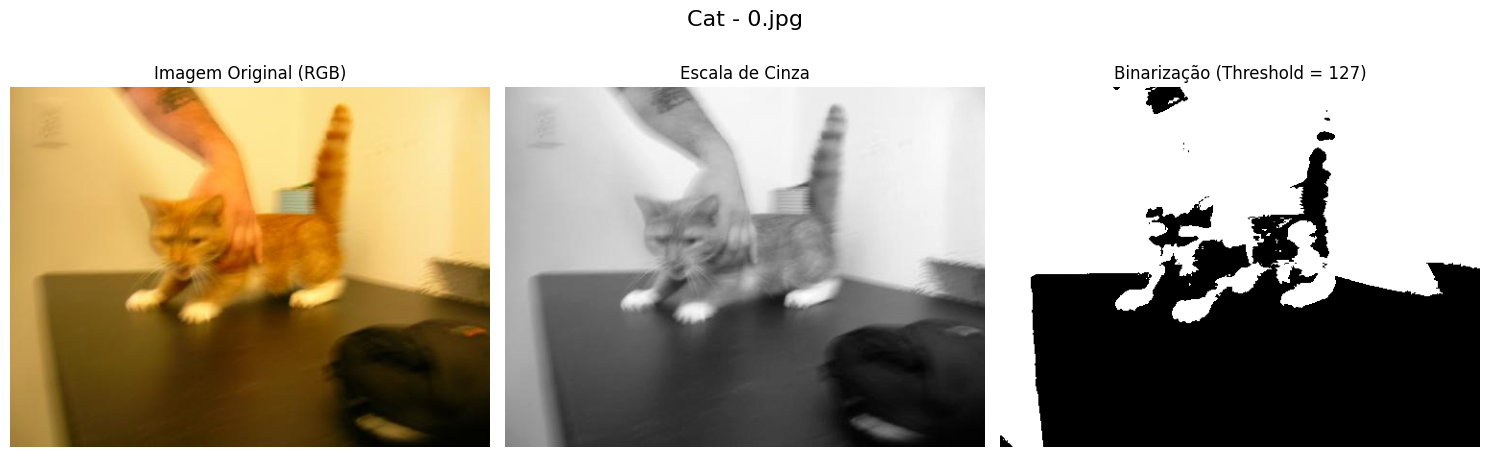


Processando: 1.jpg


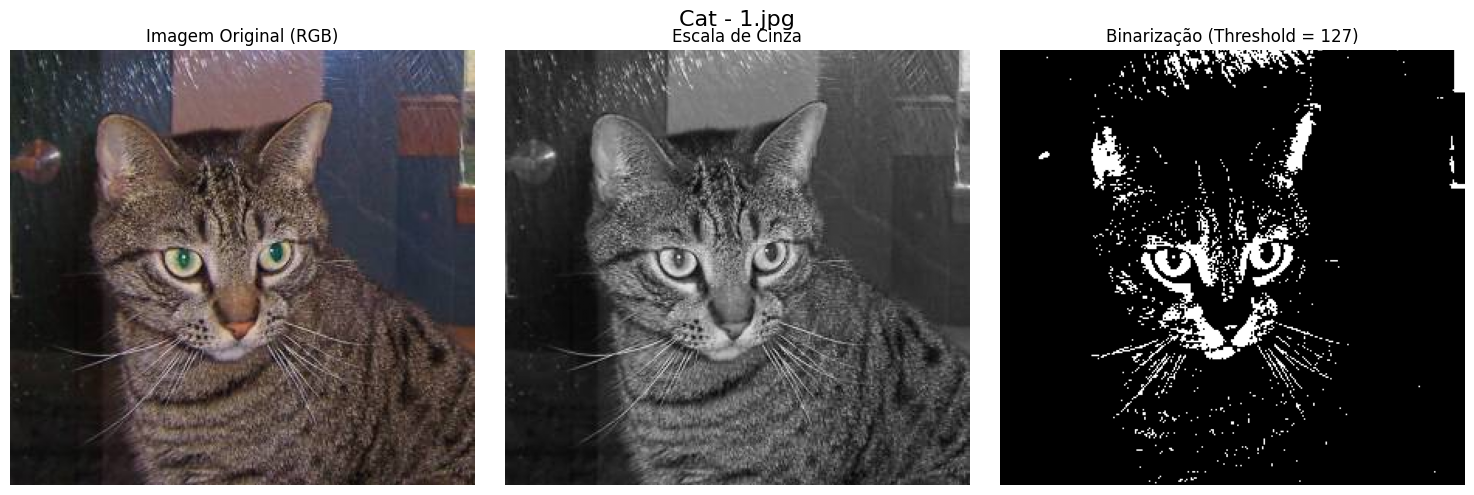


Processando imagens de Dog

Processando: 0.jpg


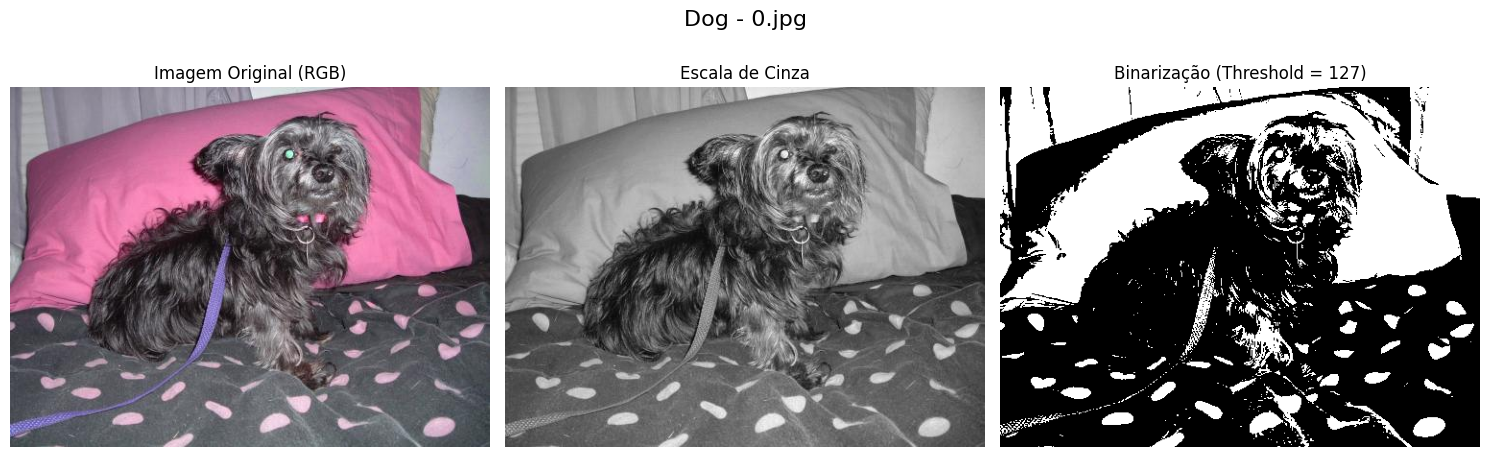


Processando: 1.jpg


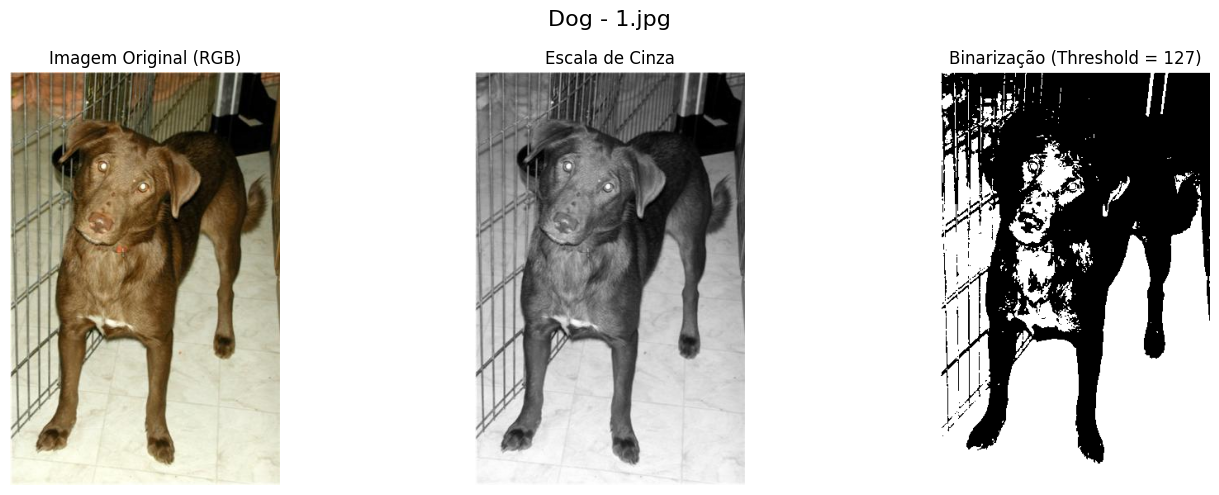

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Funções de processamento de imagem (sem OpenCV)
def rgb_to_grayscale(image_array):
    """
    Converte imagem RGB para escala de cinza usando a fórmula padrão
    """
    if len(image_array.shape) == 3:  # Se for imagem colorida (H, W, 3)
        # Método: 0.299 × R + 0.587 × G + 0.114 × B
        gray = 0.299 * image_array[:,:,0] + 0.587 * image_array[:,:,1] + 0.114 * image_array[:,:,2]
        return gray.astype(np.uint8)
    else:  # Já está em escala de cinza
        return image_array

def binarize_image(gray_image, threshold=127):
    """
    Binariza uma imagem usando threshold
    """
    # Aplicar threshold
    binary_image = np.where(gray_image > threshold, 255, 0).astype(np.uint8)
    return binary_image

# Função para processar e visualizar uma imagem
def process_and_visualize_image(image_path, title="Processamento de Imagem"):
    """
    Processa uma imagem e mostra os 3 estágios: Original, Escala de Cinza, Binarizada
    """
    try:
        # Carregar imagem com PIL
        pil_image = Image.open(image_path)
        
        # Converter para array numpy
        image_array = np.array(pil_image)
        
        # Converter para escala de cinza
        if len(image_array.shape) == 3:
            gray_image = rgb_to_grayscale(image_array)
        else:
            gray_image = image_array
        
        # Binarizar com threshold fixo
        binary_image = binarize_image(gray_image, threshold=127)
        
        # Visualizar resultados
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(title, fontsize=16)
        
        # Imagem Original
        axes[0].imshow(image_array)
        axes[0].set_title('Imagem Original (RGB)')
        axes[0].axis('off')
        
        # Escala de Cinza
        axes[1].imshow(gray_image, cmap='gray')
        axes[1].set_title('Escala de Cinza')
        axes[1].axis('off')
        
        # Binarização
        axes[2].imshow(binary_image, cmap='gray')
        axes[2].set_title('Binarização (Threshold = 127)')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return image_array, gray_image, binary_image
        
    except Exception as e:
        print(f"Erro ao processar imagem {image_path}: {e}")
        return None, None, None

# Função para processar imagens do dataset de cachorros/gatos
def process_dataset_images(data_dir="data/PetImages", num_images=3):
    """
    Processa várias imagens do dataset de pets
    """
    # Classes disponíveis
    classes = ["Cat", "Dog"]
    
    for pet_class in classes:
        class_path = os.path.join(data_dir, pet_class)
        if not os.path.exists(class_path):
            print(f"Pasta não encontrada: {class_path}")
            continue
            
        # Obter lista de imagens
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        if not image_files:
            print(f"Nenhuma imagem encontrada em {class_path}")
            continue
            
        print(f"\n{'='*50}")
        print(f"Processando imagens de {pet_class}")
        print(f"{'='*50}")
        
        # Processar algumas imagens
        for i, image_file in enumerate(image_files[:num_images]):
            image_path = os.path.join(class_path, image_file)
            try:
                print(f"\nProcessando: {image_file}")
                process_and_visualize_image(
                    image_path, 
                    f"{pet_class} - {image_file}"
                )
            except Exception as e:
                print(f"Erro ao processar {image_file}: {e}")
                continue

# Função para comparar diferentes thresholds
def compare_thresholds(image_path):
    """
    Compara diferentes valores de threshold
    """
    try:
        # Carregar imagem
        pil_image = Image.open(image_path)
        image_array = np.array(pil_image)
        
        # Converter para escala de cinza
        if len(image_array.shape) == 3:
            gray_image = rgb_to_grayscale(image_array)
        else:
            gray_image = image_array
        
        # Diferentes thresholds
        thresholds = [50, 100, 127, 150, 200]
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('Comparação de Diferentes Thresholds', fontsize=16)
        
        # Imagem original em escala de cinza
        axes[0, 0].imshow(gray_image, cmap='gray')
        axes[0, 0].set_title('Original (Escala de Cinza)')
        axes[0, 0].axis('off')
        
        # Binarizações com diferentes thresholds
        for i, threshold in enumerate(thresholds):
            row = (i + 1) // 3
            col = (i + 1) % 3
            
            binary = binarize_image(gray_image, threshold)
            axes[row, col].imshow(binary, cmap='gray')
            axes[row, col].set_title(f'Threshold = {threshold}')
            axes[row, col].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Erro ao comparar thresholds: {e}")

# Demonstração
def demonstrate_binarization():
    """
    Demonstração completa do processo de binarização
    """
    print("🔍 Demonstração de Binarização de Imagens")
    print("=" * 50)
    
    # Verificar se há imagens no dataset
    data_dir = "data/PetImages"
    if os.path.exists(data_dir):
        print("✅ Dataset encontrado!")
        process_dataset_images(num_images=2)  # Processar 2 imagens de cada classe
    else:
        print("❌ Dataset não encontrado.")
        print("Por favor, verifique se o caminho está correto ou coloque algumas imagens em 'data/PetImages/Cat/' e 'data/PetImages/Dog/'")

# Executar demonstração
if __name__ == "__main__":
    demonstrate_binarization()